In [132]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [133]:
# Cargar el conjunto de datos
housing = fetch_california_housing()

In [134]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [135]:
# Crear el conjunto de datos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [136]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


In [137]:
# crear el modelo de red neuronal:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

In [138]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                270       
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
# Compilar el modelo

model.compile(loss="mean_squared_error",
              optimizer='sgd',
              metrics = [keras.metrics.RootMeanSquaredError(),
                         'mean_absolute_error'])

In [140]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 1.8018 - root_mean_squared_error: 1.3423 - mean_absolute_error: 0.6769 - val_loss: 0.5098 - val_root_mean_squared_error: 0.7140 - val_mean_absolute_error: 0.5013
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6589 - root_mean_squared_error: 0.8117 - mean_absolute_error: 0.5210 - val_loss: 0.4773 - val_root_mean_squared_error: 0.6909 - val_mean_absolute_error: 0.4854
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4438 - root_mean_squared_error: 0.6662 - mean_absolute_error: 0.4776 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6639 - val_mean_absolute_error: 0.4666
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4356 - root_mean_squared_error: 0.6600 - mean_absolute_error: 0.4684 - val_loss: 0.4320 - val_root_mean_squared_error: 0.6573 - val_mean_absolute_error: 0.4574
Epoch 5/10
363/363 [==============================] - 1s

<Axes: >

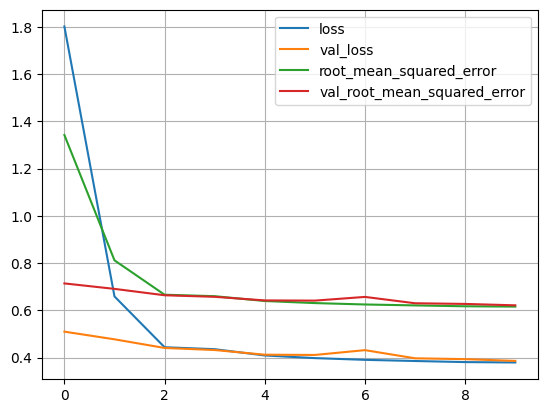

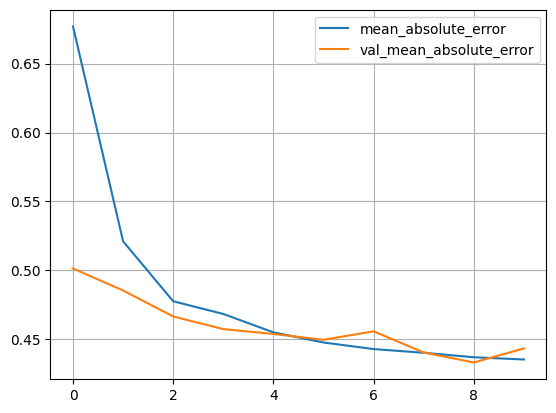

In [141]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_error', 'val_mean_absolute_error']].plot(grid=True)

In [142]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo en el conjunto de entrenamiento')
print('loss train:', loss)
print('root_mean_squared_error train:', RMSE)
print('mean_absolute_error train:', MAPE)

# Evaluar el modelo en el conjunto de validacion
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print('Evaluar el modelo en el conjunto de validacion')
print('loss valid:', loss)
print('root_mean_squared_error valid:', RMSE)
print('mean_absolute_error valid:', MAPE)

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print('Evaluar el modelo en el conjunto de prueba')
print('loss test:', loss)
print('root_mean_squared_error test:', RMSE)
print('mean_absolute_error test:', MAPE)

363/363 [==============================] - 1s 3ms/step - loss: 0.3744 - root_mean_squared_error: 0.6119 - mean_absolute_error: 0.4393
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.37440013885498047
root_mean_squared_error train: 0.6118824481964111
mean_absolute_error train: 0.43932250142097473
121/121 [==============================] - 0s 3ms/step - loss: 0.3860 - root_mean_squared_error: 0.6213 - mean_absolute_error: 0.4434
Evaluar el modelo en el conjunto de validacion
loss valid: 0.38598546385765076
root_mean_squared_error valid: 0.6212772727012634
mean_absolute_error valid: 0.4434301257133484
162/162 [==============================] - 1s 3ms/step - loss: 0.3704 - root_mean_squared_error: 0.6086 - mean_absolute_error: 0.4378
Evaluar el modelo en el conjunto de prueba
loss test: 0.3703981339931488
root_mean_squared_error test: 0.6086034178733826
mean_absolute_error test: 0.43777281045913696


## Preguntas

## Qué conjunto de datos se utilza en este codigo y que problema de aprendizaje automatico se aborda?

Conjunto de datos es relacionado a viviendas de California. Se aborda un problema de regresión

## Qué hace la función train_test_split() de scikit-learn y por qué se utiliza en este código?

La función train_test_split() de la biblioteca scikit-learn se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para prueba (testing). Esto es esencial en el aprendizaje automático porque permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, lo cual es fundamental para medir la capacidad de generalización del modelo.  

Se utiliza para definir las variables referencia para el entrenamiento del modeo: X_train_full, X_test, y_train_full, y_test

## Por qué es importante estandarizar los datos antes de entrenar un modelo de redes neuronales?

Los datos se estandarizan por:

1. Convergencia más rápida y estable: Las redes neuronales se entrenan utilizando algoritmos de optimización como el gradiente descendente. Estos algoritmos funcionan mejor cuando las características de entrada están en escalas similares. Estandarizar los datos (es decir, hacer que tengan una media de 0 y una desviación estándar de 1) ayuda a que el gradiente descendente converja más rápidamente y de manera más estable.

2. Evitar que algunas características dominen: Si las características tienen diferentes escalas, las que tienen valores más grandes pueden dominar el proceso de entrenamiento, lo que lleva a que el modelo aprenda más sobre esas características y menos sobre las otras. Esto puede resultar en un modelo sesgado y menos preciso.

3. Mejorar el rendimiento del modelo: Las redes neuronales suelen funcionar mejor cuando las entradas están estandarizadas. Esto es especialmente importante para capas que utilizan funciones de activación como ReLU o Sigmoid, que pueden saturarse y volverse menos sensibles a las entradas si estas no están en un rango adecuado.

4. Facilitar el entrenamiento y la generalización: Estandarizar los datos puede ayudar a que el modelo aprenda de manera más efectiva y generalice mejor a datos no vistos. Esto se debe a que la estandarización puede reducir el riesgo de sobreajuste, ya que el modelo no tendrá que adaptarse a escalas de características dispares.

## Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?

Arquitectura de la Red Neuronal

* Capa de entrada: La red no tiene explícitamente una capa de entrada  definida, pero la primera capa densa (Dense) actúa como tal. Se define con el parámetro input_shape, que indica la forma de los datos de entrada.
* Primera capa oculta: Una capa densa (Dense) con 30 neuronas y la función de activación ReLU (relu).
* Capa de salida: Una capa densa (Dense) con una sola neurona y sin función de activación especificada (lo que implica una activación lineal por defecto).

Detalle de la Arquitectura

* Número de capas: El modelo tiene un total de 2 capas densas.
** Primera capa oculta: 30 neuronas con activación ReLU.
** Capa de salida: 1 neurona con activación lineal (por defecto).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
=================================================================
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

## Qué funcion de activación se utiliza en la capa oculta de la red neuronal y por qué se elige esa función?

ReLU, Rectified Linear Unit. Se usa por:
* Aceleración del Entrenamiento: ReLU permite que las redes converjan más rápido en comparación con las funciones de activación sigmoide o tanh debido a sus propiedades de gradiente y sparsity.
* Simplicidad y Eficiencia Computacional: La función ReLU es definida como $$ ReLU(x)=max⁡(0,x) $$. Esta operación es computacionalmente barata y fácil de implementar, lo que la hace eficiente en términos de tiempo de cálculo.

## Qué función de perdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?

Se utiliza la función de pérdida mean squared error (MSE) para compilar el modelo. En este caso, la pérdida MSE se define como el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.

La elección de **MSE** como función de pérdida es apropiada para problemas de regresión porque:

* Penaliza más fuertemente los errores grandes en comparación con los errores pequeños debido a la naturaleza cuadrática de la fórmula.
* Es fácil de derivar y utilizar en algoritmos de optimización como el descenso de gradiente.

**Métricas de rendimiento**

1. Loss (Pérdida):
* La función de pérdida utilizada aquí es el mean squared error (MSE), que fue especificada durante la compilación del modelo.
* Mide el promedio de los cuadrados de los errores entre las predicciones y los valores reales.

2. Root Mean Squared Error (RMSE):
* Esta métrica calcula la raíz cuadrada del error cuadrático medio.
* RMSE es una medida de la dispersión de las predicciones del modelo con respecto a los valores reales.
* Es útil porque tiene la misma unidad de medida que la variable objetivo y es más interpretable que el MSE en términos de magnitud de los errores.

3. Mean Absolute Percentage Error (MAPE):
* Esta métrica calcula el error porcentual absoluto medio.
* MAPE es útil para entender el error relativo en términos porcentuales, lo que es interpretativamente beneficioso, especialmente cuando los valores de la variable objetivo tienen diferentes magnitudes.

Estas métricas permiten evaluar diferentes aspectos del rendimiento del modelo:

* Loss (MSE): Da una medida global de la calidad de las predicciones del modelo.
* RMSE: Proporciona una interpretación más directa del error en las mismas unidades que la variable objetivo.
* MAPE: Ofrece una perspectiva del error en términos porcentuales, lo que puede ser más comprensible cuando los valores objetivo varían significativamente.

## Cuántas epocas se utilizan para entrenar el modelo y por qué se elige este número?

Se usan 10 epocas, se usa este número para evitar sobre ajuste del modelo.

* Si la pérdida de validación comienza a aumentar mientras la pérdida de entrenamiento sigue disminuyendo, esto puede ser una señal de sobreajuste.

* Si el modelo sigue mejorando significativamente en la pérdida de validación hacia la época 10, puede ser útil entrenar durante más épocas.